In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Target / Label is "Chance of Admit" 

In [26]:
df.shape

(500, 9)

In [27]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

In [28]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [29]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Null Values Found

In [30]:
df.duplicated().sum()

0

* No duplicates are Found

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Dropping unique Rows to not make model complex

In [32]:
df.drop(columns = 'Serial No.', inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


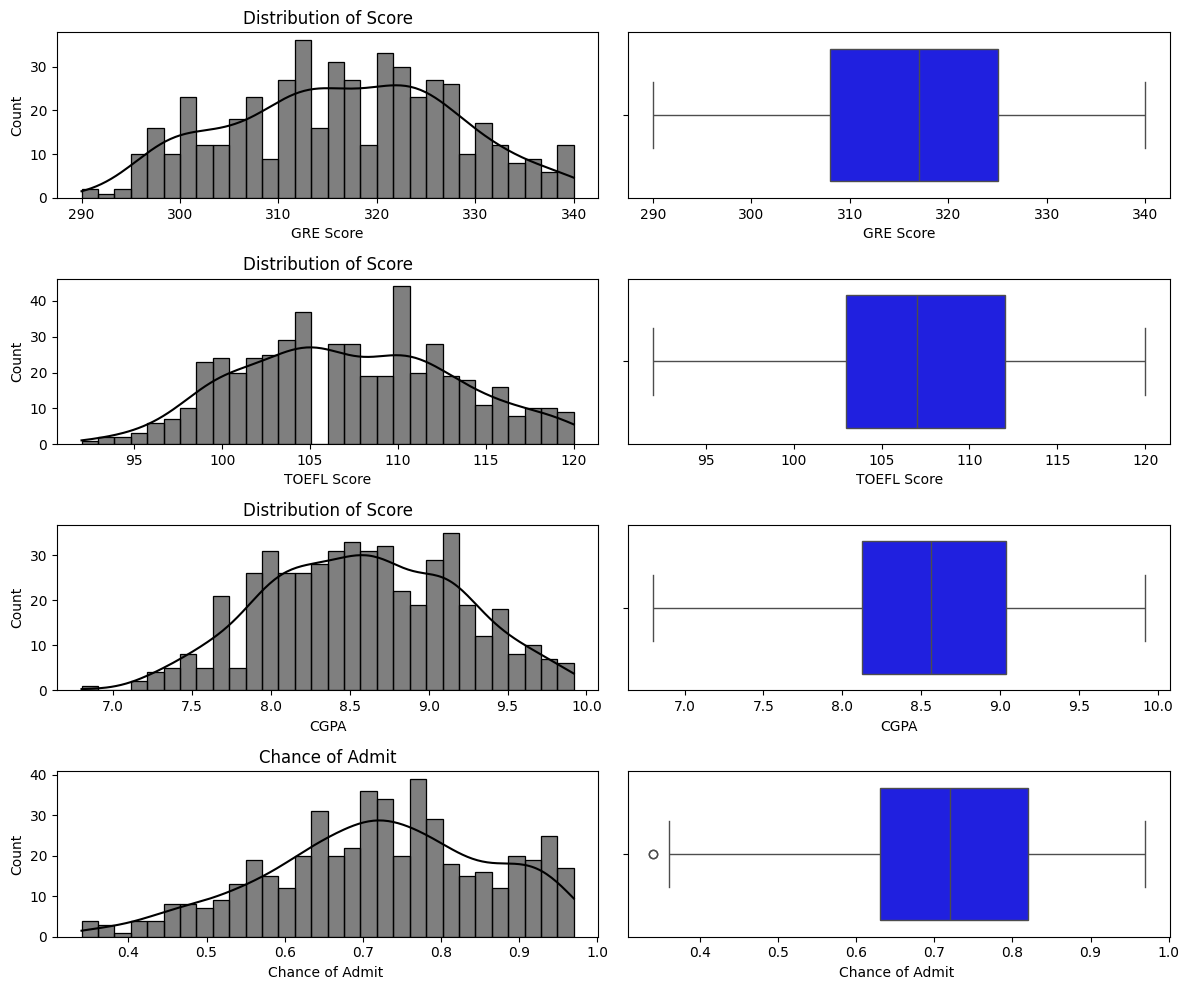

In [33]:
plt.figure(figsize=(12, 10))


plt.subplot(4, 2, 1)
sns.histplot(df['GRE Score'], kde=True, color='black', bins = 30)
plt.title('Distribution of Score')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['GRE Score'], color='b')

plt.subplot(4, 2, 3)
sns.histplot(df['TOEFL Score'], kde=True, color='black', bins = 30)
plt.title('Distribution of Score')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['TOEFL Score'], color='b')

plt.subplot(4, 2, 5)
sns.histplot(df['CGPA'], kde=True, color='black', bins = 30)
plt.title('Distribution of Score')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['CGPA'], color='b')

plt.subplot(4, 2, 7)
sns.histplot(df['Chance of Admit '], kde=True, color='black', bins = 30)
plt.title('Chance of Admit')

plt.subplot(4, 2, 8)
sns.boxplot(x=df['Chance of Admit '], color='b')

plt.tight_layout()

plt.show()

* No outliers in Numericals Features
* One outlier in Target and has 2 records with the value.
* Features are Normally Distributed.
* Target is slightly Left Skewed.

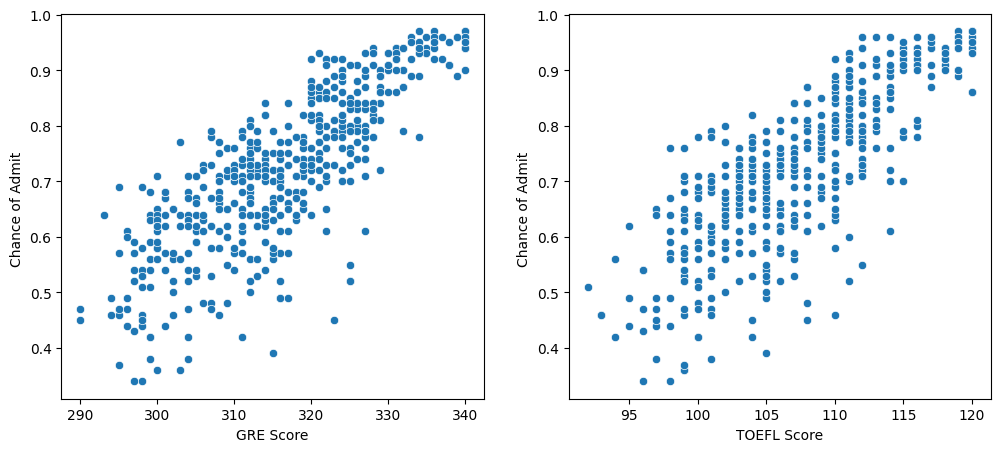

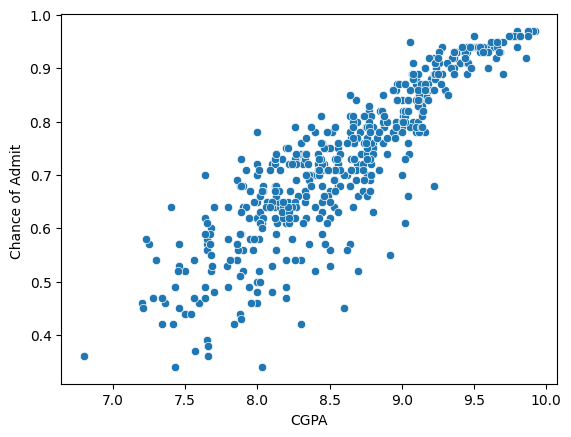

In [34]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

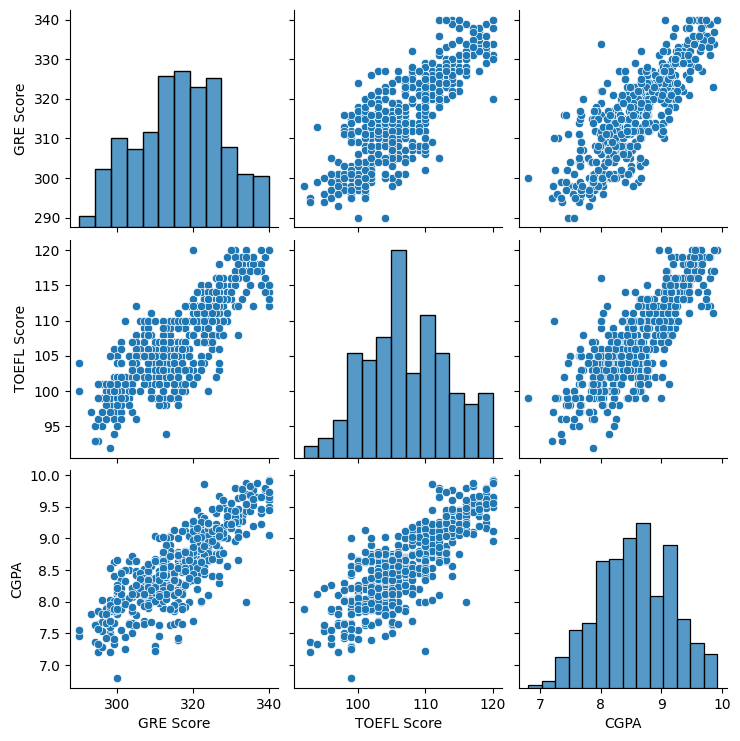

In [35]:
sns.pairplot(df[num_cols])

** Linear Relationship with all continuous variables  

In [36]:
df = df[df['Chance of Admit '] != 0.34]

Dropped 2 outliers with same value. Since they don't add any value to the model.

C:\Users\prave\AppData\Local\Temp\ipykernel_1100\531374644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='University Rating', data=df, palette='viridis')
C:\Users\prave\AppData\Local\Temp\ipykernel_1100\531374644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SOP', data=df, palette='viridis')
C:\Users\prave\AppData\Local\Temp\ipykernel_1100\531374644.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Research', data=df, palette='viridis')


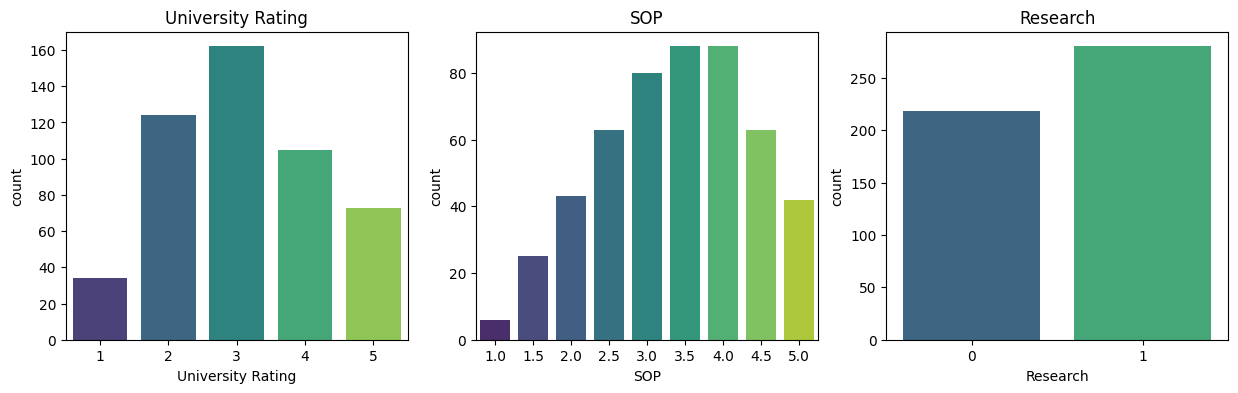

In [37]:
plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
sns.countplot(x='University Rating', data=df, palette='viridis')
plt.title('University Rating')

plt.subplot(1,3,2)
sns.countplot(x='SOP', data=df, palette='viridis')
plt.title('SOP')

plt.subplot(1,3,3)
sns.countplot(x='Research', data=df, palette='viridis')
plt.title('Research')

plt.show()

<Axes: >

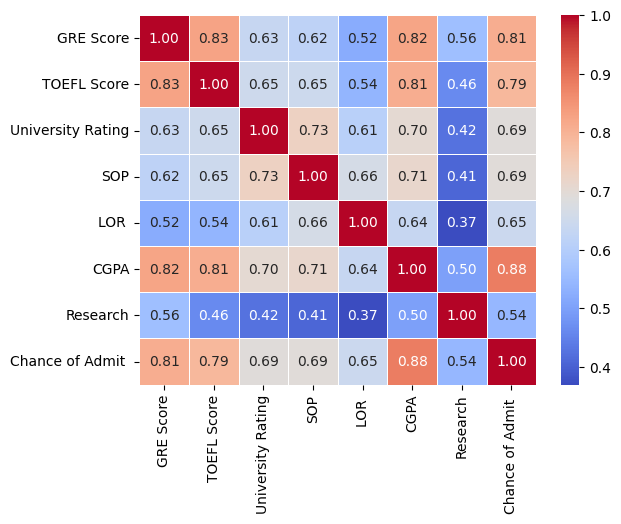

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

*  Feature Selection & Data Pre Processing

No Encoding is needed as all the data is in numerical values

In [39]:
X = df.iloc[:,:-1]
y = df[target]

In [40]:
sc = StandardScaler()

X = sc.fit_transform(X)

X.shape

(498, 7)

*Model Building

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [42]:
new_df = df.iloc[:,:-1].copy()

In [43]:
def model_train(x_train, x_test, y_train, y_test, type, data,  alpha = 0.1):


    if type == 'linear':
        type = type.upper()
        model = LinearRegression()
    elif type == 'ridge':
        type = type.upper()
        model = Ridge(alpha = alpha)
    else:
        type = type.upper()
        model = Lasso(alpha = alpha)
    
    model.fit(x_train, y_train)

    train_preds = model.predict(x_train)

    test_preds = model.predict(x_test)

    mse_train = np.round(mean_squared_error(y_train, train_preds),2)

    mse_test = np.round(mean_squared_error(y_test, test_preds),2)

    r2_train = np.round(r2_score(y_train, train_preds),2)

    r2_test = np.round(r2_score(y_test, test_preds),2)

    n, p = x_train.shape[0], x_train.shape[1]

    adj_r2 = lambda n, p, r2 : -((1 - r2)*(n - 1) / (n - p -1)) + 1

    adj_r2_train = np.round(adj_r2(n, p, r2_train),2)


    print('-'*10,' '*10, type, ' REGRESSION VALUES' ,' '*10 ,('-'*10))

    print("\n\n")


    print(f'             Train MSE : {mse_train :}     Test MSE : {mse_test}')

    print('\n')

    print(f'             Train R2 Score : {r2_train}  Test R2 Score : {r2_test}')

    print('\n')

    print(f'             Trained Adjusted R2 Score : {adj_r2_train}')

    print("\n\n")


    print(f'             Intercept : {np.round(model.intercept_,2)}')

    print("\n\n")


    print('Weights for Features')

    coef_df = pd.DataFrame({"Column": data.columns, "Coef": np.round(model.coef_,5)})
    print(coef_df)

    return r2_train, r2_test, model

In [44]:
model_train(x_train, x_test, y_train, y_test, type='linear', data=new_df)

----------            LINEAR  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.83  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.83



             Intercept : 0.72



Weights for Features
              Column     Coef
0          GRE Score  0.02127
1        TOEFL Score  0.01769
2  University Rating  0.00556
3                SOP  0.00433
4               LOR   0.01707
5               CGPA  0.06968
6           Research  0.01088


(0.83, 0.82, LinearRegression())

In [45]:
model_train(x_train, x_test, y_train, y_test, type='ridge', data=new_df)

----------            RIDGE  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.83  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.83



             Intercept : 0.72



Weights for Features
              Column     Coef
0          GRE Score  0.02129
1        TOEFL Score  0.01770
2  University Rating  0.00556
3                SOP  0.00434
4               LOR   0.01708
5               CGPA  0.06961
6           Research  0.01088


(0.83, 0.82, Ridge(alpha=0.1))

In [46]:
model_train(x_train, x_test, y_train, y_test, type='lasso', data = new_df)

----------            LASSO  REGRESSION VALUES            ----------



             Train MSE : 0.01     Test MSE : 0.01


             Train R2 Score : 0.25  Test R2 Score : 0.28


             Trained Adjusted R2 Score : 0.24



             Intercept : 0.72



Weights for Features
              Column     Coef
0          GRE Score  0.00000
1        TOEFL Score  0.00000
2  University Rating  0.00000
3                SOP  0.00000
4               LOR   0.00000
5               CGPA  0.02207
6           Research  0.00000


(0.25, 0.28, Lasso(alpha=0.1))

In [47]:
alpha_vals = np.linspace(0.1, 0.001, 10)
train_scores = []
test_scores = []


for i in alpha_vals:

    tr, ts = model_train(x_train, x_test, y_train, y_test, type='lasso', data=new_df, alpha=i)

    train_scores.append(tr)

    test_scores.append(ts)

    print(i)

train_scores, test_scores

----------            LASSO  REGRESSION VALUES            ----------



             Train MSE : 0.01     Test MSE : 0.01


             Train R2 Score : 0.25  Test R2 Score : 0.28


             Trained Adjusted R2 Score : 0.24



             Intercept : 0.72



Weights for Features
              Column     Coef
0          GRE Score  0.00000
1        TOEFL Score  0.00000
2  University Rating  0.00000
3                SOP  0.00000
4               LOR   0.00000
5               CGPA  0.02207
6           Research  0.00000


ValueError: too many values to unpack (expected 2)

*L1 is not performing well for default alpha value



*Need Hyper Parameter tuning to find optimum alpha value

Text(0.5, 1.0, 'R2 Score vs Alpha values')

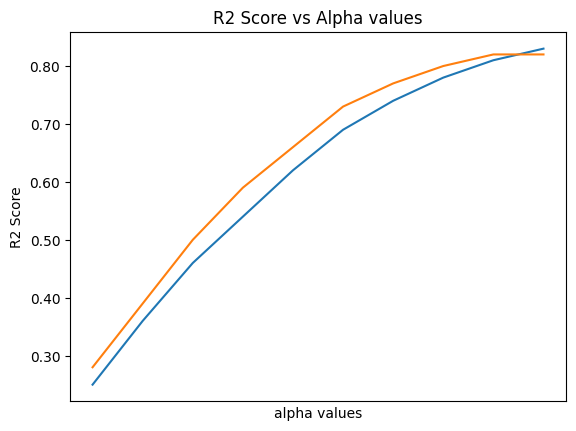

In [ ]:
plt.plot(train_scores)

plt.plot(test_scores)

plt.xticks([])

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))


plt.xlabel('alpha values')

plt.ylabel('R2 Score')

plt.title('R2 Score vs Alpha values')

* For decreasing alpha value there is increasing r2 score for both train & test data.

In [ ]:
model_train(x_train, x_test, y_train, y_test, type='lasso', data = new_df, alpha=0.001)

----------            LASSO  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.83  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.83



             Intercept : 0.72



Weights for Features
              Column     Coef
0          GRE Score  0.02113
1        TOEFL Score  0.01743
2  University Rating  0.00535
3                SOP  0.00412
4               LOR   0.01666
5               CGPA  0.06981
6           Research  0.01033


(0.83, 0.82)

* Linear & Ridge are giving same values while Lasso throwing different values for same alpha value of ridge. So I adjusted alpha until I got the same values.
* Lasso also penalized the weights when alpha is "0.1".
* It shows the model is not overfitting

Linear Regression Assumption tests

1 . Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

Need to ensure all the datatypes of features are either float or int

In [ ]:
def vif_calcualte(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['Values'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

    return vif

In [ ]:
vif_calcualte(new_df)

,features,Values
0,GRE Score,1309.623782
1,TOEFL Score,1215.268311
2,University Rating,20.997182
3,SOP,35.536779
4,LOR,30.919485
5,CGPA,949.147371
6,Research,2.878861


Need to drop GRE Score

In [ ]:
vif_calcualte(new_df.iloc[:,1:])

,features,Values
0,TOEFL Score,638.468305
1,University Rating,19.968093
2,SOP,33.944475
3,LOR,30.660121
4,CGPA,727.105849
5,Research,2.873545


Drop TOEFL Score

In [ ]:
vif_calcualte(new_df.iloc[:,2:])

,features,Values
0,University Rating,19.854950
1,SOP,33.846473
2,LOR,30.385737
3,CGPA,25.094955
4,Research,2.852030


Drop SOP

In [ ]:
vif_calcualte(new_df.iloc[:,2:].drop(columns='SOP'))

,features,Values
0,University Rating,15.130940
1,LOR,26.921739
2,CGPA,22.410811
3,Research,2.826416


In [ ]:
new_df.drop(columns=['GRE Score', 'TOEFL Score','SOP', 'LOR '], inplace=True)

Drop LOR

In [ ]:
vif_calcualte(new_df)

,features,Values
0,University Rating,12.493480
1,CGPA,11.060084
2,Research,2.791217


Drop University Rating

In [ ]:
vif_calcualte(new_df.iloc[:,1:])

,features,Values
0,CGPA,2.466668
1,Research,2.466668


In [ ]:
new_df.drop(columns='University Rating', inplace=True)
new_df.head()

,CGPA,Research
0,9.65,1
1,8.87,1
2,8.00,1
3,8.67,1
4,8.21,0


Build model with 'CGPA' & 'Research'

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(new_df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
model_train(x_train, x_test, y_train, y_test, type='linear', data=new_df)

----------            LINEAR  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.79  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.79



             Intercept : 0.72



Weights for Features
     Column     Coef
0      CGPA  0.11511
1  Research  0.01876


(0.79, 0.82)

In [ ]:
model_train(x_train, x_test, y_train, y_test, type='ridge', data=new_df)

----------            RIDGE  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.79  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.79



             Intercept : 0.72



Weights for Features
     Column     Coef
0      CGPA  0.11507
1  Research  0.01877


(0.79, 0.82)

In [ ]:
model_train(x_train, x_test, y_train, y_test, type='lasso', data=new_df, alpha = 0.001)

----------            LASSO  REGRESSION VALUES            ----------



             Train MSE : 0.0     Test MSE : 0.0


             Train R2 Score : 0.79  Test R2 Score : 0.82


             Trained Adjusted R2 Score : 0.79



             Intercept : 0.72



Weights for Features
     Column     Coef
0      CGPA  0.11442
1  Research  0.01810


(0.79, 0.82, Lasso(alpha=0.001))

2.The mean of residuals is nearly zero


MSE for Linear, L1 & L2 is zero

3 Linearity of variables (no pattern in the residual plot)

In [ ]:
_, _, model = model_train(x_train, x_test, y_train, y_test, type='lasso', data=new_df, alpha = 0.001)

import statsmodels.api as sm

plt.figure(figsize=(15, 4))

y_pred = model.predict(x_test)

residuals = (y_test - y_pred)

4 Test for Homoscedasticity 

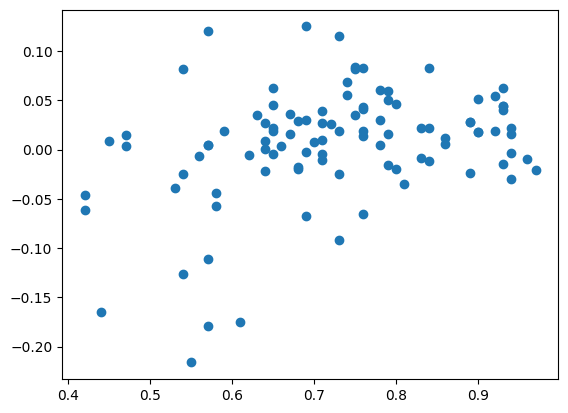

In [ ]:
plt.scatter(y_test, residuals)

No cone shaped graph so there is no Homoscedasticity 

5.Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

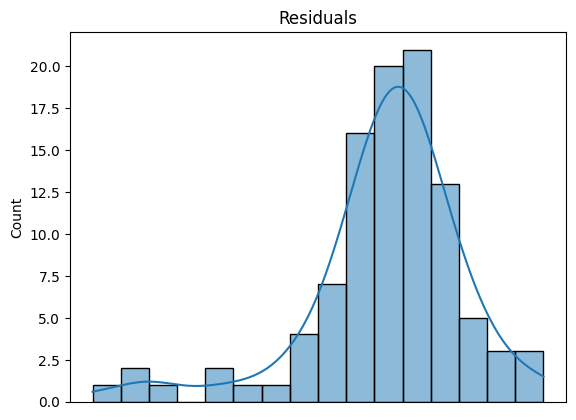

In [ ]:

sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.xticks([])
plt.xlabel('')



plt.show()

In [ ]:
print('MAE', mean_absolute_error(y_test, y_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

print('r2_score', r2_score(y_test, y_pred))

MAE 0.04127373495034301
RMSE 0.05845342575614301
r2_score 0.8180116058177368


1 CGPA is the most important feature.


2 CGPA & Research are the only 2 features needed.


3 MAE : 0.04
  
  RMSE : 0.05

  R2_Score : 0.81